# アンサンブル学習アルゴリズム

## Bagging

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 欠損確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# 欠損削除
df.dropna(inplace=True)

In [ ]:
# 欠損再確認
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [ ]:
# X,yを作成
X = df.loc[:,(df.columns != 'survived') & (df.columns != 'alive')]
y = df['survived']

In [ ]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,True
879,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,False
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True


In [ ]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [ ]:
# one-hotエンコーディング（今回使わない）
pd.get_dummies(X)

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
1,1,38.0,1,0,71.2833,False,False,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,35.0,1,0,53.1000,False,False,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6,1,54.0,0,0,51.8625,True,True,0,1,0,...,0,0,0,0,1,0,0,0,0,1
10,3,4.0,1,1,16.7000,False,False,1,0,0,...,0,0,0,0,0,0,1,0,0,1
11,1,58.0,0,0,26.5500,False,True,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,False,False,1,0,0,...,0,0,0,1,0,0,0,0,0,1
872,1,33.0,0,0,5.0000,True,True,0,1,0,...,0,1,0,0,0,0,0,0,0,1
879,1,56.0,0,1,83.1583,False,False,1,0,1,...,0,0,1,0,0,0,0,1,0,0
887,1,19.0,0,0,30.0000,False,True,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# ラベルエンコーディング(デフォルトはnumpyで返る)

oe = OrdinalEncoder()
oe.fit_transform(X)


array([[ 0.,  0., 32., ...,  2.,  0.,  0.],
       [ 0.,  0., 28., ...,  2.,  2.,  0.],
       [ 0.,  1., 49., ...,  4.,  2.,  1.],
       ...,
       [ 0.,  0., 51., ...,  2.,  0.,  0.],
       [ 0.,  0., 12., ...,  1.,  2.,  1.],
       [ 0.,  1., 18., ...,  2.,  0.,  1.]])

In [ ]:
# ラベルエンコーディング

oe = OrdinalEncoder()
oe.set_output(transform='pandas')
X = oe.fit_transform(X)


In [ ]:
# ホールドアウト
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 長さ
len(X_train)

127

In [ ]:
len(X_test)

55

In [ ]:
BaggingClassifier(random_state=0)
clf = BaggingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [ ]:
y_test[:5]

484    1
110    0
195    1
496    1
889    1
Name: survived, dtype: int64

In [ ]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
484,0.0,1.0,17.0,1.0,0.0,73.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
110,0.0,1.0,42.0,0.0,0.0,42.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0
195,0.0,0.0,53.0,0.0,0.0,82.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
496,0.0,0.0,49.0,1.0,0.0,63.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0
889,0.0,1.0,18.0,0.0,0.0,23.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0


In [ ]:
y_pred

array([[0.5, 0.5],
       [0.8, 0.2],
       [0.1, 0.9],
       [0. , 1. ],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.7, 0.3],
       [0. , 1. ],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.7, 0.3],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.5,

In [ ]:
# 精度確認
from sklearn.metrics import roc_auc_score
print(f"bagging AUC: {roc_auc_score(y_test, y_pred[:, 1])}")

bagging AUC: 0.8974358974358974


AUC:ROCの下の面積の部分で１に近いと精度高い。ランダムは0.5

In [ ]:
# 単一の決定木の精度
from sklearn.tree import DecisionTreeClassifier
single_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred_tree = single_tree.predict_proba(X_test)

In [ ]:
# 予測
y_pred_tree

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
from sklearn.metrics import roc_auc_score
print(f"singletree AUC: {roc_auc_score(y_test, y_pred_tree[:, 1])}")

singletree AUC: 0.7724358974358974


木の深さ(max_depth)がデフォルトのため分割できるところまで分割してしまうので過学習気味で0,1になってしまう

In [ ]:
# それぞれのモデル（決定木）を表示
clf.estimators_

[DecisionTreeClassifier(random_state=2087557356),
 DecisionTreeClassifier(random_state=132990059),
 DecisionTreeClassifier(random_state=1109697837),
 DecisionTreeClassifier(random_state=123230084),
 DecisionTreeClassifier(random_state=633163265),
 DecisionTreeClassifier(random_state=998640145),
 DecisionTreeClassifier(random_state=1452413565),
 DecisionTreeClassifier(random_state=2006313316),
 DecisionTreeClassifier(random_state=45050103),
 DecisionTreeClassifier(random_state=395371042)]

## ランダムフォレスト

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# バギング時に使用データ
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
621,0.0,1.0,36.0,1.0,0.0,43.0,2.0,0.0,1.0,1.0,3.0,2.0,0.0
245,0.0,1.0,38.0,2.0,0.0,72.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
539,0.0,0.0,14.0,0.0,2.0,37.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
136,0.0,0.0,12.0,0.0,2.0,14.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0
789,0.0,1.0,41.0,0.0,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.0,1.0,42.0,0.0,0.0,29.0,2.0,0.0,1.0,1.0,3.0,2.0,1.0
336,0.0,1.0,21.0,1.0,0.0,54.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0
581,0.0,0.0,33.0,1.0,1.0,77.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
268,0.0,0.0,53.0,0.0,1.0,84.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0


In [ ]:
# 学習と予測
rf = RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0).fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)

In [ ]:
y_pred_rf

array([[0.45308779, 0.54691221],
       [0.50960609, 0.49039391],
       [0.20834087, 0.79165913],
       [0.19410814, 0.80589186],
       [0.47753474, 0.52246526],
       [0.51214474, 0.48785526],
       [0.45965954, 0.54034046],
       [0.26842434, 0.73157566],
       [0.16953571, 0.83046429],
       [0.17025825, 0.82974175],
       [0.47792423, 0.52207577],
       [0.18700101, 0.81299899],
       [0.19166621, 0.80833379],
       [0.17025825, 0.82974175],
       [0.47792423, 0.52207577],
       [0.45587835, 0.54412165],
       [0.46968969, 0.53031031],
       [0.19253416, 0.80746584],
       [0.1602281 , 0.8397719 ],
       [0.49870186, 0.50129814],
       [0.18435511, 0.81564489],
       [0.34840058, 0.65159942],
       [0.17262741, 0.82737259],
       [0.17453396, 0.82546604],
       [0.21848196, 0.78151804],
       [0.47492652, 0.52507348],
       [0.51936762, 0.48063238],
       [0.20780439, 0.79219561],
       [0.489223  , 0.510777  ],
       [0.49070816, 0.50929184],
       [0.

In [ ]:
# 精度確認
print(f"random forest AUC: {roc_auc_score(y_test, y_pred_rf[:,1])}")

random forest AUC: 0.9447115384615384


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 各特徴量の重要度
rf.feature_importances_

array([0.01, 0.17, 0.12, 0.06, 0.01, 0.06, 0.01, 0.01, 0.22, 0.24, 0.06,
       0.  , 0.03])

<BarContainer object of 13 artists>

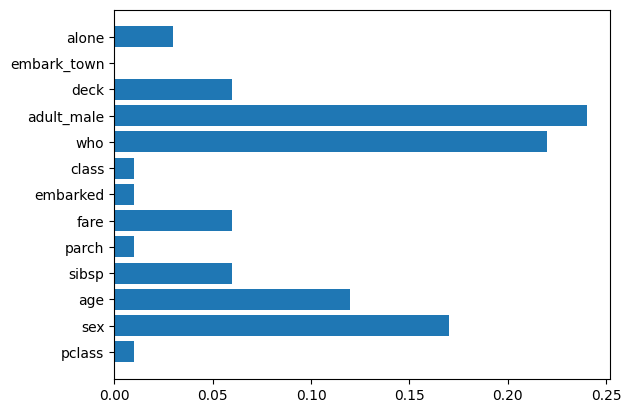

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X.columns, rf.feature_importances_)

[Text(0.5, 0.75, 'x[9] <= 0.5\ngini = 0.453\nsamples = 77\nvalue = [44, 83]'),
 Text(0.25, 0.25, 'gini = 0.195\nsamples = 37\nvalue = [7, 57]'),
 Text(0.75, 0.25, 'gini = 0.485\nsamples = 40\nvalue = [37, 26]')]

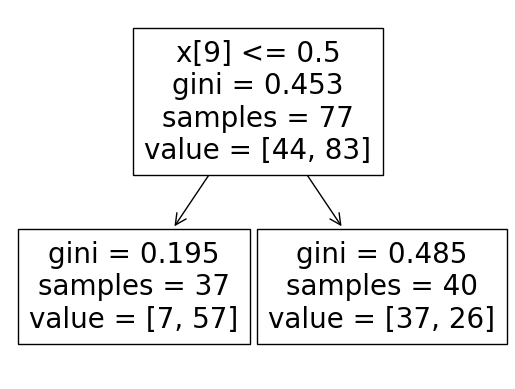

In [ ]:
# 学習した決定木の描画
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0])

## ブースティング(adaboost)

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
621,0.0,1.0,36.0,1.0,0.0,43.0,2.0,0.0,1.0,1.0,3.0,2.0,0.0
245,0.0,1.0,38.0,2.0,0.0,72.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
539,0.0,0.0,14.0,0.0,2.0,37.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
136,0.0,0.0,12.0,0.0,2.0,14.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0
789,0.0,1.0,41.0,0.0,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.0,1.0,42.0,0.0,0.0,29.0,2.0,0.0,1.0,1.0,3.0,2.0,1.0
336,0.0,1.0,21.0,1.0,0.0,54.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0
581,0.0,0.0,33.0,1.0,1.0,77.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
268,0.0,0.0,53.0,0.0,1.0,84.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0


In [ ]:
# 訓練・予測
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate = 0.01, random_state=0).fit(X_train,y_train)
y_pred_ada = ada.predict_proba(X_test)
print(f"adaboost AUC: {roc_auc_score(y_test, y_pred_ada[:, 1])}")

adaboost AUC: 0.9375


In [ ]:
y_pred_ada

array([[0.54323198, 0.45676802],
       [0.54889004, 0.45110996],
       [0.18854307, 0.81145693],
       [0.18854307, 0.81145693],
       [0.54323198, 0.45676802],
       [0.58396935, 0.41603065],
       [0.54323198, 0.45676802],
       [0.26239761, 0.73760239],
       [0.18507559, 0.81492441],
       [0.18507559, 0.81492441],
       [0.54323198, 0.45676802],
       [0.18854307, 0.81145693],
       [0.18854307, 0.81145693],
       [0.18507559, 0.81492441],
       [0.54323198, 0.45676802],
       [0.54323198, 0.45676802],
       [0.54323198, 0.45676802],
       [0.18854307, 0.81145693],
       [0.18507559, 0.81492441],
       [0.54889004, 0.45110996],
       [0.18507559, 0.81492441],
       [0.26239761, 0.73760239],
       [0.18507559, 0.81492441],
       [0.18507559, 0.81492441],
       [0.18854307, 0.81145693],
       [0.54323198, 0.45676802],
       [0.54889004, 0.45110996],
       [0.18854307, 0.81145693],
       [0.54889004, 0.45110996],
       [0.54889004, 0.45110996],
       [0.

<BarContainer object of 13 artists>

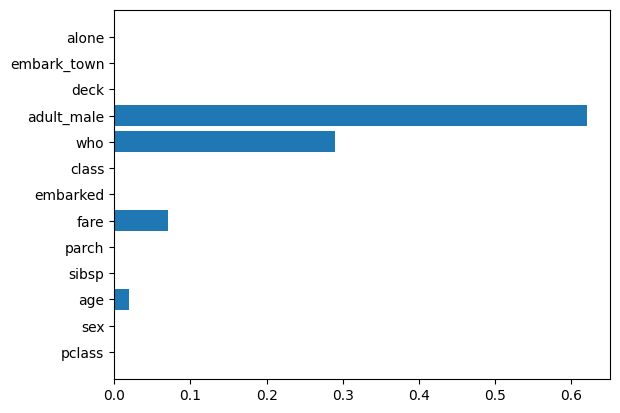

In [ ]:
# 重要な特徴量
import matplotlib.pyplot as plt
ada.feature_importances_
plt.barh(X.columns, ada.feature_importances_)

偏った特徴量つかわれる

## 勾配ブースティング（回帰）

### スクラッチ実装

In [ ]:
from sklearn.tree import DecisionTreeRegressor
class MyGradientBoostingRegressor:

    def __init__(self, learning_rate=0.4, n_estimators=40, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X,y):
        self.F0 = y.mean()
        Fb = self.F0
        for _ in range(self.n_estimators):
            # 残差計算
            r = y - Fb
            # 残差を目的変数に学習
            estimator= DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            Fb += self.learning_rate * weight
            self.estimators.append(estimator)
    def predict(self, X):
        Fb = self.F0
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
        return Fb


In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

<Axes: xlabel='horsepower', ylabel='mpg'>

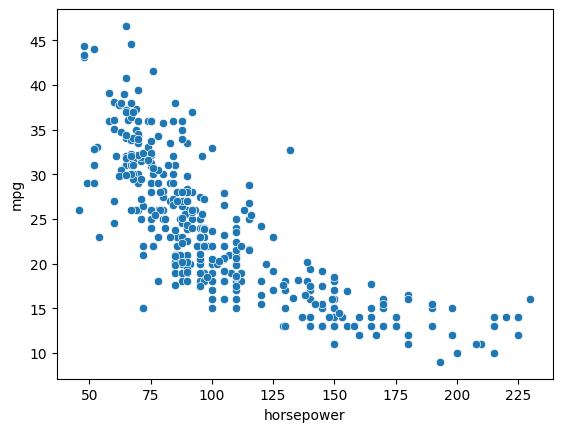

In [ ]:
# numpyのみサポートのためnumpy化

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
# 馬力vs燃費
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [ ]:
my_mgbr = MyGradientBoostingRegressor(learning_rate=0.4, n_estimators=40, max_depth=2, random_state=40)
my_mgbr.fit(X, y)

In [ ]:
my_mgbr.estimators

[DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_depth=2, random_state=40),
 DecisionTreeRegressor(max_d

In [ ]:
my_mgbr.predict(X)

array([16.57367568, 14.15214032, 14.78040479, 14.78040479, 16.18887874,
       12.70441109, 13.44552675, 12.19432684, 13.2287975 , 13.52235976,
       14.15214032, 14.15214032, 14.78040479, 13.2287975 , 22.56053929,
       22.56053929, 22.14386057, 24.02176702, 24.71472384, 26.49522399,
       24.02176702, 24.71472384, 22.56053929, 23.48574104, 24.71472384,
       12.19432684, 11.50982847, 11.50982847, 11.3015276 , 24.71472384,
       24.71472384, 22.56053929, 20.15060705, 20.15060705, 20.15060705,
       24.71472384, 20.15060705, 14.15214032, 13.52235976, 14.4323765 ,
       14.78040479, 13.52235976, 14.15214032, 13.52235976, 20.15060705,
       23.66312939, 20.15060705, 24.71472384, 24.02176702, 24.71472384,
       32.46640554, 30.0796469 , 35.3576703 , 32.46640554, 32.47614045,
       32.46640554, 22.56053929, 27.92309333, 25.0961171 , 24.71472384,
       24.02176702, 14.15214032, 13.52235976, 14.78040479, 14.4323765 ,
       14.78040479, 11.50982847, 14.4323765 , 14.15214032, 13.52

### 勾配ブースティング木実装(scikit-learn)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lr = 0.4
gbr = GradientBoostingRegressor(learning_rate=lr, n_estimators=40, max_depth=2, random_state=40).fit(X, y)

In [ ]:
# 予測とスクラッチとの一致性
gbr.predict(X)==my_mgbr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

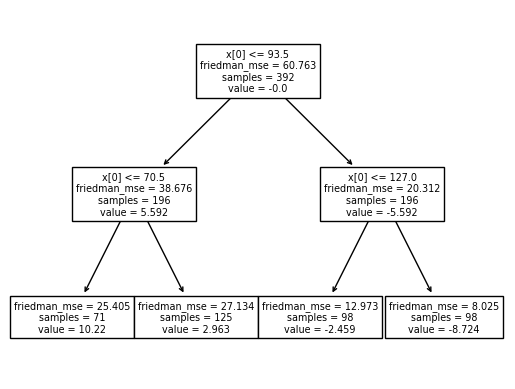

In [ ]:
# 一つ目の決定木の描画
from sklearn.tree import plot_tree
model=gbr.estimators_[0][0]
_ = plot_tree(model)

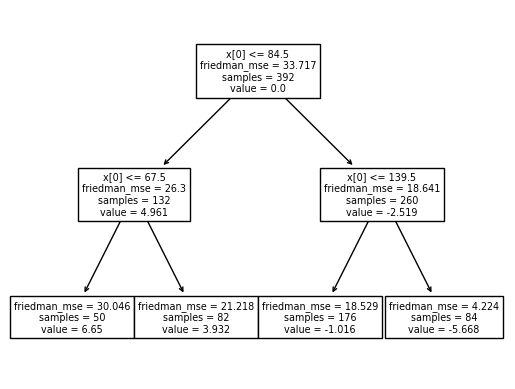

In [ ]:
# 二つ目の決定木の描画
from sklearn.tree import plot_tree
model=gbr.estimators_[1][0]
_ = plot_tree(model)

In [ ]:
# 決定木を全部足し合わせると最終的な予測値になるのかを確認
results = []
idx = 0
for t in gbr.estimators_:
    result =t[0].predict([X[idx]])
    results.append(result*lr)

In [ ]:
# 全て足すと一致するか（一番最初の予測値と一致）
import numpy as np
F0 = np.mean(y)
Fb = F0 + np.cumsum(results)[-1]
Fb

16.5736756847196

In [ ]:
# リストの長さ
len(results)

40

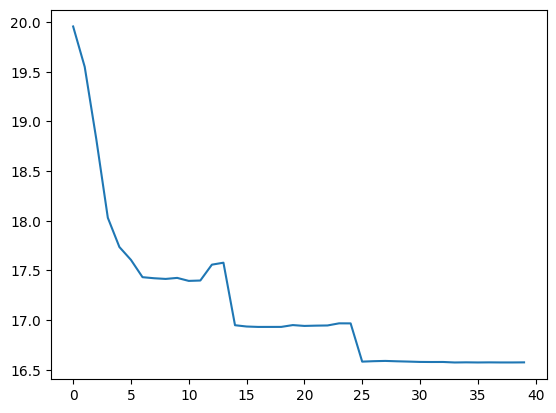

In [ ]:
# イテレーションでの予測値の変化
plt.plot(np.cumsum(results)+F0)

## 勾配ブースティング（回帰）

### スクラッチ実装


In [ ]:
model = DecisionTreeRegressor(max_depth=1, random_state=0).fit(X, y)

In [ ]:
# それぞれの値がどの葉におちるか
model.apply(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

In [ ]:
X

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [150.],
       [20

In [ ]:
model.tree_.value

array([[[23.44591837]],

       [[29.0377551 ]],

       [[17.85408163]]])

[Text(0.5, 0.75, 'x[0] <= 93.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.25, 'squared_error = 38.676\nsamples = 196\nvalue = 29.038'),
 Text(0.75, 0.25, 'squared_error = 20.312\nsamples = 196\nvalue = 17.854')]

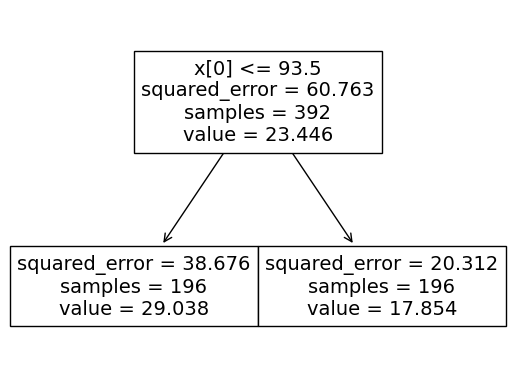

In [ ]:
plot_tree(model)

In [ ]:
model.predict(X)

array([17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 29.0377551 , 17.85408163, 17.85408163, 29.0377551 ,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 29.0377551 ,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       29.0377551 , 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 29.0377551 , 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 17.85408163, 29.0377551 , 29.0377551 , 29.0377551 ,
       29.0377551 , 17.85408163, 17.85408163, 17.85408163, 17.85408163,
       17.85408163, 17.85408163, 17.85408163, 17.85408163, 17.85


### sikitlearnで実装

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# ハイパーパラメータ設定と学習
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.03, max_depth=1, random_state=0).fit(X_train, y_train)
print(f"grad boost AUC: {roc_auc_score(y_test,gbc.predict_proba(X_test)[:,1])}")

grad boost AUC: 0.9407051282051282


In [ ]:
# 予測
gbc.predict_proba(X_test)[:,1]

array([0.5514342 , 0.4329777 , 0.80125347, 0.80125347, 0.5514342 ,
       0.25797762, 0.5514342 , 0.83715418, 0.88099514, 0.88099514,
       0.5514342 , 0.82137752, 0.82137752, 0.88099514, 0.5514342 ,
       0.5514342 , 0.5514342 , 0.82137752, 0.88099514, 0.40100637,
       0.88099514, 0.78760146, 0.88099514, 0.88099514, 0.80125347,
       0.5514342 , 0.40100637, 0.80125347, 0.4329777 , 0.4329777 ,
       0.4329777 , 0.88099514, 0.88099514, 0.88099514, 0.82137752,
       0.88099514, 0.82137752, 0.88099514, 0.40100637, 0.5514342 ,
       0.4329777 , 0.82137752, 0.5514342 , 0.78760146, 0.40100637,
       0.88099514, 0.88099514, 0.5514342 , 0.5514342 , 0.5514342 ,
       0.5514342 , 0.82137752, 0.5514342 , 0.88099514, 0.88099514])

In [ ]:
# 確認
y_train

621    1
245    0
539    1
136    1
789    0
      ..
515    0
336    0
581    1
268    1
835    1
Name: survived, Length: 127, dtype: int64

In [ ]:
# それぞれの弱学習機の結果より計算式正しいか
results = []
for t in gbc.estimators_:
    result = 0.03 *t[0].predict([X_test.iloc[0]])
    results.append(result)

In [ ]:
# 型チェック
X_test.shape

(55, 13)

In [ ]:
X_test.iloc[0].shape

(13,)

In [ ]:
results

[array([-0.0345878]),
 array([-0.03318089]),
 array([-0.031862]),
 array([-0.03062256]),
 array([-0.0294551]),
 array([-0.02835308]),
 array([-0.02731078]),
 array([-0.02632315]),
 array([-0.02538573]),
 array([-0.02449456]),
 array([-0.02364609]),
 array([-0.02283717]),
 array([-0.02206497]),
 array([-0.02132694]),
 array([-0.02062078]),
 array([-0.01994441]),
 array([-0.01929595]),
 array([-0.01867368]),
 array([-0.01807605]),
 array([-0.01750162]),
 array([-0.01694908]),
 array([-0.01641725]),
 array([-0.01590501]),
 array([-0.01541135]),
 array([-0.01493533]),
 array([0.00465099]),
 array([-0.01442438]),
 array([0.00452146]),
 array([-0.01251955]),
 array([0.0043904]),
 array([-0.01351591]),
 array([0.00426807]),
 array([-0.0117473]),
 array([0.00414404]),
 array([0.01089113]),
 array([0.00405465]),
 array([-0.01124497]),
 array([0.01064964]),
 array([0.00396656]),
 array([-0.01205979]),
 array([0.01039677]),
 array([0.00388601]),
 array([0.01019387]),
 array([0.0038026]),
 array([

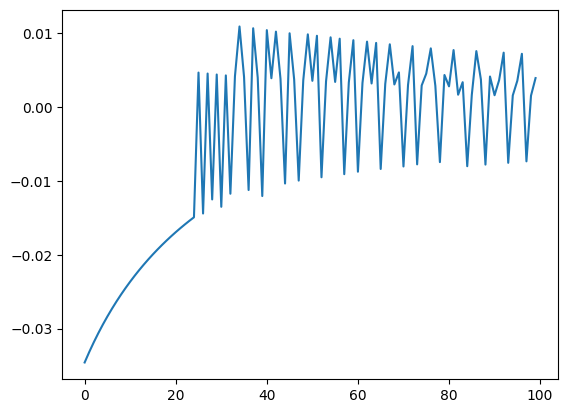

In [ ]:
plt.plot(results)

In [ ]:
F0 = np.log(y_train.mean()/(1-y_train.mean()))

In [ ]:
F0

0.6696166831497514

In [ ]:
Fb = F0+np.cumsum(results)[-1]

In [ ]:
predict = 1/(1+np.exp(-Fb))

In [ ]:
predict

0.551434197251246

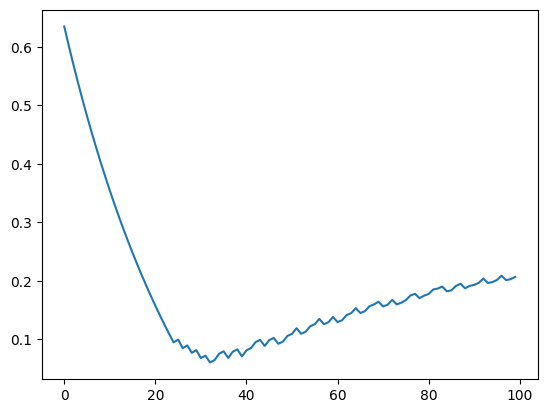

In [ ]:
plt.plot(F0+np.cumsum(results))

## XGBoost

In [ ]:
pip install xgboost

In [ ]:
# 学習データ&テストデータ作成
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
df = sns.load_dataset('titanic')
df.dropna(inplace=True)
# X, yを作成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
y = df['survived']
oe = OrdinalEncoder()
oe.set_output(transform='pandas')
X = oe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
621,0.0,1.0,36.0,1.0,0.0,43.0,2.0,0.0,1.0,1.0,3.0,2.0,0.0
245,0.0,1.0,38.0,2.0,0.0,72.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
539,0.0,0.0,14.0,0.0,2.0,37.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
136,0.0,0.0,12.0,0.0,2.0,14.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0
789,0.0,1.0,41.0,0.0,0.0,65.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.0,1.0,42.0,0.0,0.0,29.0,2.0,0.0,1.0,1.0,3.0,2.0,1.0
336,0.0,1.0,21.0,1.0,0.0,54.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0
581,0.0,0.0,33.0,1.0,1.0,77.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
268,0.0,0.0,53.0,0.0,1.0,84.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0


In [ ]:
# モデル構築と学習
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01,
              eval_metric='auc',
              early_stopping_rounds=10,
              importance_type='total_gain',
              random_state=0
              )
# evalはタプル形式で指定(本来はtrainをホールドアウトして検証データ作るようにする)
xgb.fit(X_train,y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.85497
[1]	validation_0-auc:0.85497
[2]	validation_0-auc:0.85497
[3]	validation_0-auc:0.86298
[4]	validation_0-auc:0.86298
[5]	validation_0-auc:0.86058
[6]	validation_0-auc:0.86058
[7]	validation_0-auc:0.86058
[8]	validation_0-auc:0.86058
[9]	validation_0-auc:0.86538
[10]	validation_0-auc:0.86378
[11]	validation_0-auc:0.86538
[12]	validation_0-auc:0.86538
[13]	validation_0-auc:0.86378
[14]	validation_0-auc:0.87340
[15]	validation_0-auc:0.86699
[16]	validation_0-auc:0.87340
[17]	validation_0-auc:0.87500
[18]	validation_0-auc:0.87340
[19]	validation_0-auc:0.87019
[20]	validation_0-auc:0.86699
[21]	validation_0-auc:0.87019
[22]	validation_0-auc:0.87019
[23]	validation_0-auc:0.87019
[24]	validation_0-auc:0.87019
[25]	validation_0-auc:0.87019
[26]	validation_0-auc:0.86699
[27]	validation_0-auc:0.87019


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type='total_gain',
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# 評価
from sklearn.metrics import roc_auc_score
y_pred_xgb = xgb.predict_proba(X_test)
print(f"xgboost AUC: {roc_auc_score(y_test, y_pred_xgb[:, 1])}")

xgboost AUC: 0.875


In [ ]:
# 特徴量の重要度
xgb.feature_importances_

array([0.        , 0.        , 0.1168234 , 0.00336676, 0.        ,
       0.15797192, 0.        , 0.        , 0.        , 0.64561296,
       0.04408471, 0.        , 0.03214021], dtype=float32)

<Axes: >

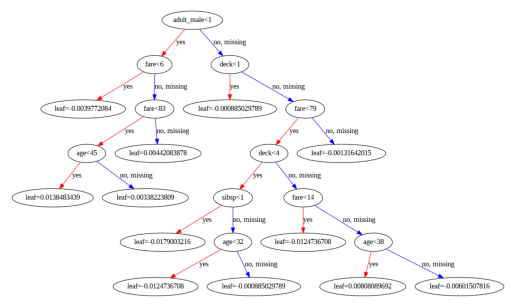

In [ ]:
# 木構造の描画
import xgboost
xgboost.plot_tree(xgb, num_trees=0)

## LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
# モデル構築・学習
lgbmc = lgb.LGBMClassifier(boosting_type='goss',
                   max_depth=5,
                   random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())
lgbmc.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 84, number of negative: 43
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] To

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [ ]:
# 評価
y_pred_lgbmc = lgbmc.predict_proba(X_test)
print(f"light gbm AUC: {roc_auc_score(y_test, y_pred_lgbmc[:,1])}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
light gbm AUC: 0.9383012820512822


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

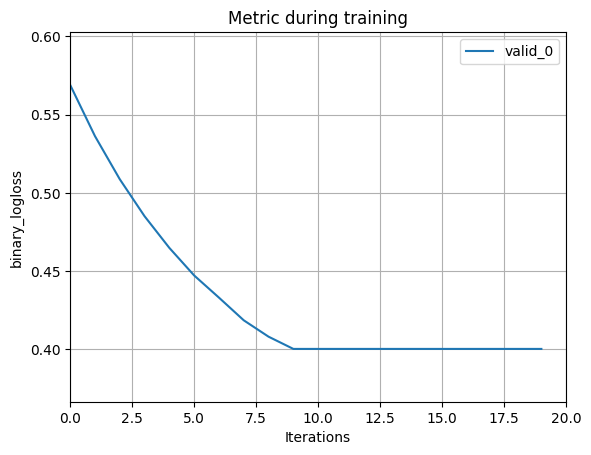

In [ ]:
# 学習曲線
lgb.plot_metric(lgbmc)

<Axes: >

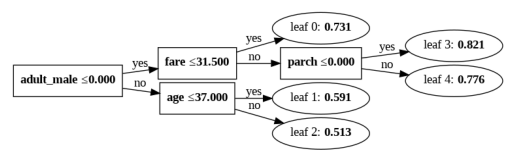

In [ ]:
lgb.plot_tree(lgbmc, tree_index=0)

## CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
# 学習データ&テストデータ作成
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
df = sns.load_dataset('titanic')
df.dropna(inplace=True)
# X, yを作成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
y = df['survived']
# Catboostがエンコーディングしてくれるのでこの部分不要
# oe = OrdinalEncoder()
# oe.set_output(transform='pandas')
# X = oe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
621,1,male,42.0,1,0,52.5542,S,First,man,True,D,Southampton,False
245,1,male,44.0,2,0,90.0000,Q,First,man,True,C,Queenstown,False
539,1,female,22.0,0,2,49.5000,C,First,woman,False,B,Cherbourg,False
136,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,False
789,1,male,46.0,0,0,79.2000,C,First,man,True,B,Cherbourg,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,male,47.0,0,0,34.0208,S,First,man,True,D,Southampton,True
336,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,False
581,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,False
268,1,female,58.0,0,1,153.4625,S,First,woman,False,C,Southampton,False


In [ ]:
# カテゴリカル変数の把握(dtype)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       182 non-null    int64   
 1   sex          182 non-null    object  
 2   age          182 non-null    float64 
 3   sibsp        182 non-null    int64   
 4   parch        182 non-null    int64   
 5   fare         182 non-null    float64 
 6   embarked     182 non-null    object  
 7   class        182 non-null    category
 8   who          182 non-null    object  
 9   adult_male   182 non-null    bool    
 10  deck         182 non-null    category
 11  embark_town  182 non-null    object  
 12  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(4)
memory usage: 15.4+ KB


In [ ]:
# intやfloat以外をカテゴリカル変数とみなして取得する
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alone']

In [ ]:
# モデル構築と学習
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.01,cat_features=cat_cols)
eval_set = [(X_test, y_test)]
cbc.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)


0:	learn: 0.6885366	test: 0.6868442	best: 0.6868442 (0)	total: 2.61ms	remaining: 2.61s
1:	learn: 0.6814490	test: 0.6793775	best: 0.6793775 (1)	total: 11.4ms	remaining: 5.66s
2:	learn: 0.6760508	test: 0.6726860	best: 0.6726860 (2)	total: 16.1ms	remaining: 5.34s
3:	learn: 0.6712676	test: 0.6671826	best: 0.6671826 (3)	total: 22.6ms	remaining: 5.63s
4:	learn: 0.6653107	test: 0.6593995	best: 0.6593995 (4)	total: 27ms	remaining: 5.37s
5:	learn: 0.6598695	test: 0.6518437	best: 0.6518437 (5)	total: 34.5ms	remaining: 5.71s
6:	learn: 0.6558456	test: 0.6467404	best: 0.6467404 (6)	total: 43.4ms	remaining: 6.16s
7:	learn: 0.6515199	test: 0.6413944	best: 0.6413944 (7)	total: 59.7ms	remaining: 7.4s
8:	learn: 0.6471426	test: 0.6356173	best: 0.6356173 (8)	total: 67.6ms	remaining: 7.44s
9:	learn: 0.6431772	test: 0.6310513	best: 0.6310513 (9)	total: 77ms	remaining: 7.62s
10:	learn: 0.6392733	test: 0.6260433	best: 0.6260433 (10)	total: 82.2ms	remaining: 7.39s
11:	learn: 0.6349835	test: 0.6211657	best: 0.6

In [ ]:
# 評価(ハイパーパラメータの調整してないから精度低く、テストデータ見えてるため過学習気味)
y_pred_cbc = cbc.predict_proba(X_test)
print(f"catboost AUC: {roc_auc_score(y_test, y_pred_cbc[:,1])}")

catboost AUC: 0.8942307692307693


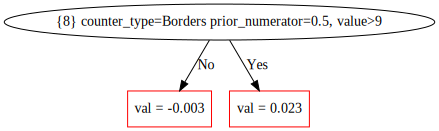

In [ ]:
# indexが8の特徴量の条件と表示され見にくい・・
cbc.plot_tree(tree_idx=0)

In [ ]:
# カテゴリカル変数の情報が木に入ってくるとモデルが持っておらずエラーになる
cbc.plot_tree(tree_idx=1)

CatBoostError: ignored

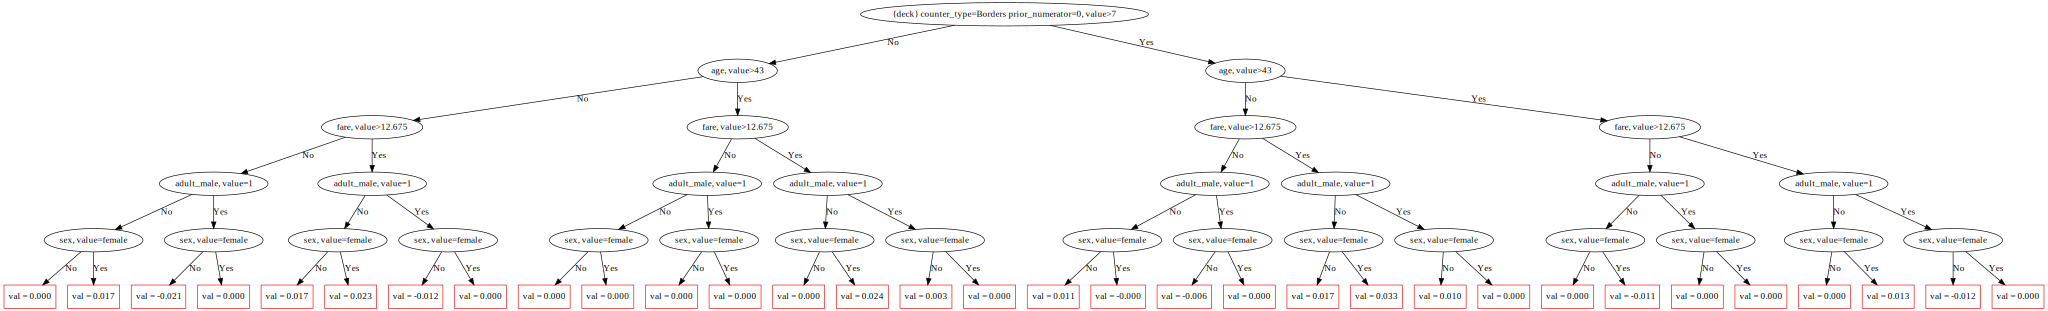

In [ ]:
# Poolという引数にオブジェクトを指定し使用することで、特徴量の名前やカテゴリカルの情報を持った状態で表示
from catboost import Pool
pool = Pool(X_train, y_train, cat_features=cat_cols)
cbc.plot_tree(tree_idx=1, pool=pool)

## スタッキング(スクラッチ実装)

In [ ]:
# 学習データ&テストデータ作成
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
df = sns.load_dataset('titanic')
df.dropna(inplace=True)
# X, yを作成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
y = df['survived']
oe = OrdinalEncoder()
oe.set_output(transform='pandas')
X = oe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# KFold定義
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# データ個数
X_train.shape

(127, 13)

In [ ]:
# KFoldセットの確認
for train_idx, test_idx in cv.split(X_train):
    print(train_idx, test_idx)
    # 分割サイズ確認
    print(len(train_idx), len(test_idx))

[  0   1   3   4   5   6   9  11  12  13  14  15  17  18  19  20  21  23
  25  26  27  28  29  31  32  33  34  35  36  37  38  39  41  42  43  44
  45  46  47  49  50  52  53  54  55  56  57  58  60  61  62  63  64  65
  67  68  69  70  72  74  75  76  77  79  80  81  82  83  84  86  87  88
  90  93  94  96  97  99 102 103 104 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125] [  2   7   8  10  16  22  24  30  40  48  51  59  66  71  73  78  85  89
  91  92  95  98 100 101 105 126]
101 26
[  0   1   2   4   5   7   8   9  10  12  14  15  16  17  19  20  21  22
  23  24  25  28  29  30  31  32  34  35  36  37  38  39  40  41  42  44
  46  47  48  49  51  53  55  56  57  58  59  61  64  65  66  67  69  70
  71  72  73  74  76  77  78  79  80  81  82  83  85  86  87  88  89  90
  91  92  93  95  97  98  99 100 101 102 103 105 106 108 109 111 112 113
 114 115 116 117 118 119 120 122 123 125 126] [  3   6  11  13  18  26  27  33  43  45  50  52  54  60  62  63

In [ ]:
# スタッキングクラス作成
class StackingClassifierCV():

    def __init__(self, estimators, final_estimator, cv):
        self.estimators = estimators # [('rf', RandomForst()), ('knn', KneighborsClassifier),・・]
        self.final_estimator =final_estimator
        self.cv = cv

    def fit(self, X, y):
        pred_features = {}
        # 1層目のモデル学習
        for model_name, model in self.estimators:
            preds = []
            new_y = []

            for train_idx, test_idx in self.cv.split(X):
                X_train,X_val = X.iloc[train_idx], X.iloc[test_idx]
                y_train,y_val = y.iloc[train_idx], y.iloc[test_idx]
                model.fit(X_train, y_train)
                pred = model.predict_proba(X_val)[:,1].tolist()
                # appendすると、アレイのリストがFoldごとにできてしまうため+=
                preds += pred
                new_y += y_val.tolist()
            # 予測用に全データで再学習
            model.fit(X, y)
            pred_features[model_name] = preds

        # 2番目のモデル学習
        new_X = pd.DataFrame(pred_features)
        self.final_estimator.fit(new_X, new_y)

    def predict_proba(self, X):
        # 1層目のモデルで特徴量(予測値)生成
        pred_features = {}
        for model_name, model in self.estimators:
            pred = model.predict_proba(X)[:, 1]
            pred_features[model_name] = pred

        new_X = pd.DataFrame(pred_features)
        final_pred = self.final_estimator.predict_proba(new_X)
        return final_pred




In [ ]:
# クロスバリデーションしてモデル構築
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)
final_estimator = LogisticRegression()
stacking_cv = StackingClassifierCV(estimators= [('rf',RandomForestClassifier()),('knn',KNeighborsClassifier())],
                                   final_estimator = final_estimator,
                                   cv=cv)

In [ ]:
# 学習
stacking_cv.fit(X_train, y_train)

In [ ]:
# 予測
y_pred_stacking_cv = stacking_cv.predict_proba(X_test)

In [ ]:
# 評価
from sklearn.metrics import roc_auc_score
print(f"stackingCV AUC:{roc_auc_score(y_test, y_pred_stacking_cv[:,1])}")

stackingCV AUC:0.8301282051282052


In [ ]:
# 一層目で作成した二層目学習用の特徴量
pd.DataFrame(pred_features)

,rf,knn
0,1.00,0.6
1,0.45,0.6
2,0.34,0.4
3,0.36,0.6
4,1.00,1.0
...,...,...
122,1.00,1.0
123,0.97,1.0
124,0.50,0.8
125,0.83,0.8


# EDA

In [ ]:
import pandas as pd

In [ ]:
cd /content/drive/MyDrive/機械学習_本番編

/content/drive/MyDrive/機械学習_本番編


In [ ]:
# ゲームの売り上げデータロード
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


それぞれのカラムの意味書いておくとよい

In [ ]:
# 欠損値カラム確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# 統計量確認
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


75%を見るとほとんどのゲームはあまり売り上げがたっていないが、
一部はかなり売れている
minとmaxが外れ値かはヒストグラムを見ればわかる

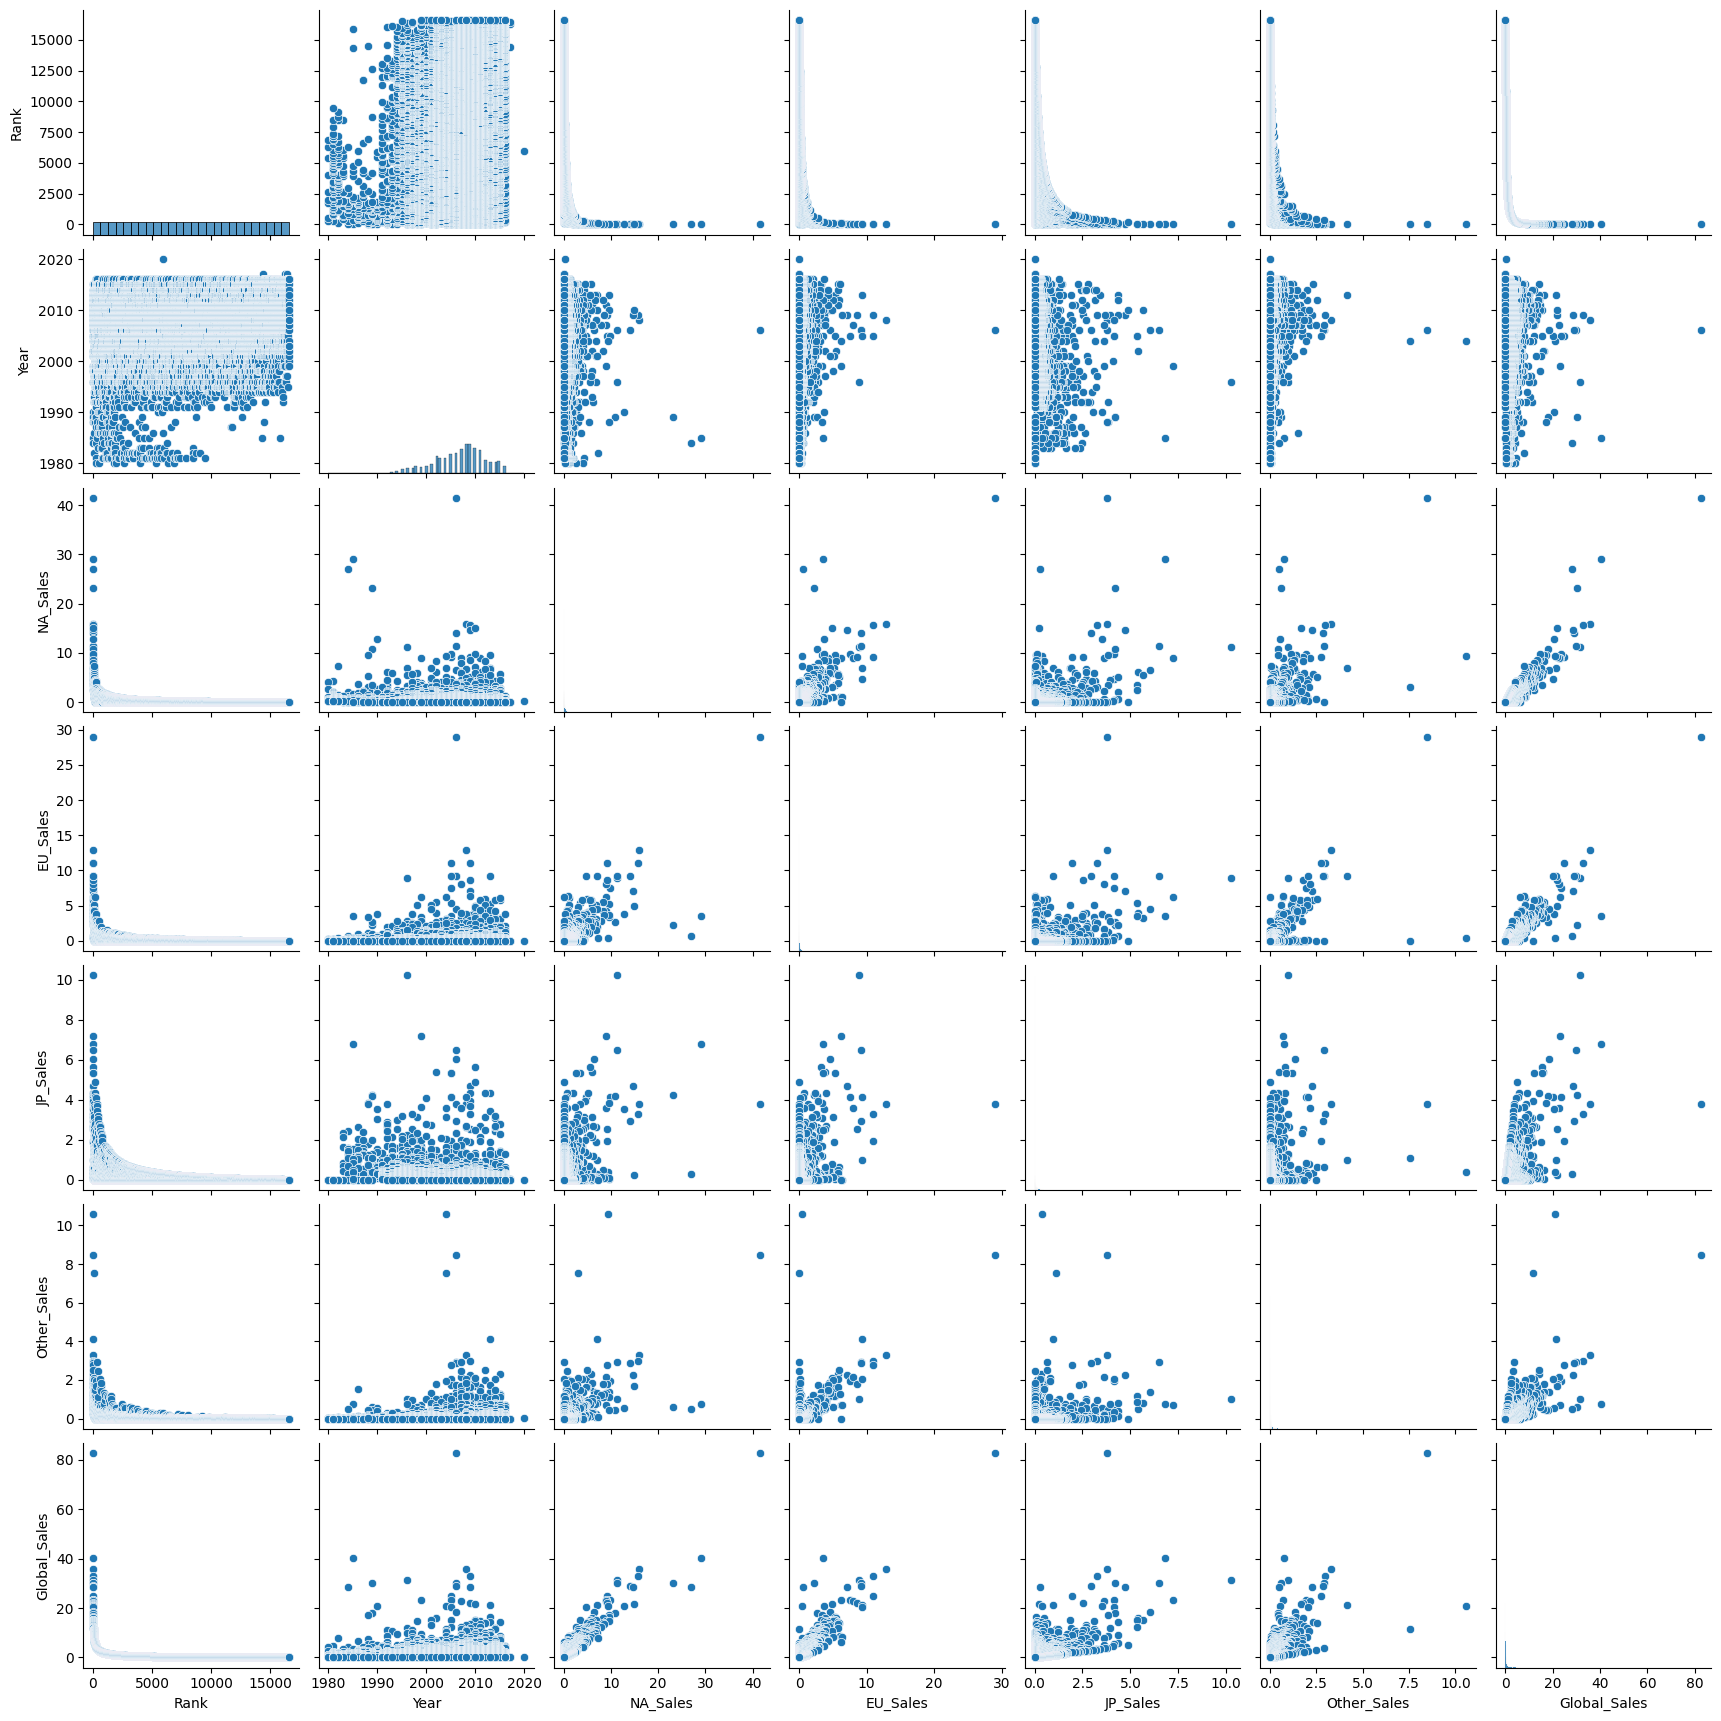

In [ ]:
# それぞれのカラムの散布図とヒストグラムを表示する
import seaborn as sns
sns.pairplot(df)

ヒストグラムはデータがかなり偏って写らないため、それ用のヒストグラムを表示するようにする（特に金額）
ログスケールをとって、込み合っているところを分散させて表示させるようにするとよい



In [ ]:
# 売り上げ低いデータ
df[df['Rank']==16599]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.0,0.01,0.0,0.0,0.01


In [ ]:
df.sort_values('Global_Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


golobal salesが0.01（かなり売り上げ低いデータ）たくさんあることわかる

In [ ]:
# global_Sales合計
df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)

<ipython-input-14-66c2e3225fe9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50
Ubisoft,6964728,1843194.0,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...,...
Ongakukan,16425,2006.0,0.00,0.00,0.01,0.00,0.01
Commseed,16460,2008.0,0.00,0.00,0.01,0.00,0.01
Takuyo,16506,2011.0,0.00,0.00,0.01,0.00,0.01


<ipython-input-15-192e9a304899>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)[0:10].plot.bar(y='Global_Sales')


<Axes: xlabel='Publisher'>

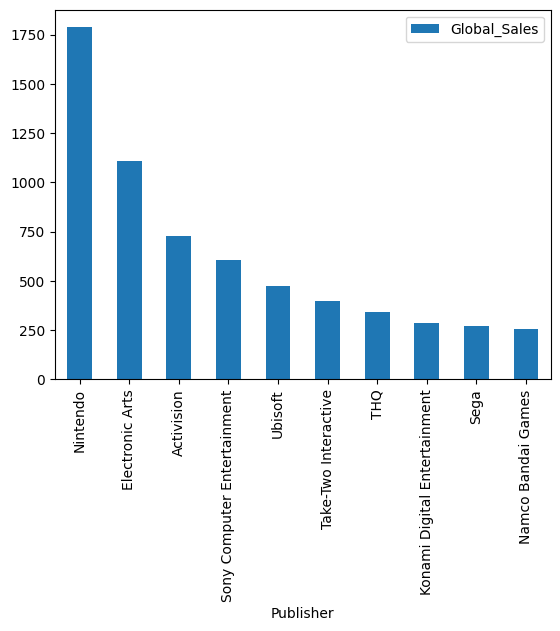

In [ ]:
# global_Sales合計トップ10を棒グラフで表示
df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False)[0:10].plot.bar(y='Global_Sales')

In [ ]:
df['Year'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
df.sort_values('Year',ascending=False)[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
8293,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
13647,13649,Hitman (2016),PS4,2016.0,Action,Square Enix,0.00,0.04,0.00,0.01,0.04
13596,13598,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,FuRyu,0.00,0.00,0.04,0.00,0.04
13602,13604,Refrain no Chika Meikyuu to Majo no Ryodan,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04
13614,13616,Utawarerumono: Futari no Hakuoro,PS4,2016.0,Misc,Aqua Plus,0.00,0.00,0.04,0.00,0.04
13620,13622,Kamen Rider: Battride War Genesis,PS3,2016.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04


本当に2017や2020は正しいのか確認→外れ値にしてよい

In [ ]:
# ジャンルごと分計
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
# プラットフォームごと分計
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<ipython-input-21-152979829bcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

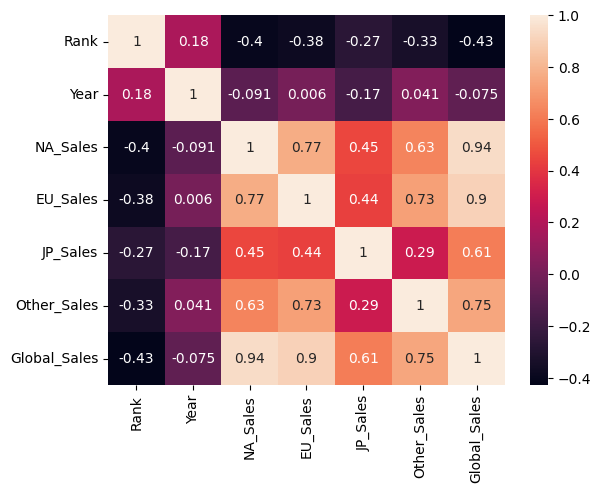

In [ ]:
# 各項目の相関
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Global salesは全salesの足し算か
df['NA_EU_JP_Other'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [ ]:
df['Global_Sales - NA_EU_JP_Other'] = df['Global_Sales'] - df['NA_EU_JP_Other']

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP_Other,Global_Sales - NA_EU_JP_Other
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,-1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,-1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,-1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.000000e+00


In [ ]:
# 絶対値を取っておく
import numpy as np
df['|Global_Sales - NA_EU_JP_Other|'] = np.abs(df['Global_Sales'] - df['NA_EU_JP_Other'])

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP_Other,Global_Sales - NA_EU_JP_Other,|Global_Sales - NA_EU_JP_Other|
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,-1.421085e-14,1.421085e-14
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,0.000000e+00,0.000000e+00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,-1.000000e-02,1.000000e-02
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,0.000000e+00,0.000000e+00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,-1.000000e-02,1.000000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,0.000000e+00,0.000000e+00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,0.000000e+00,0.000000e+00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,1.000000e-02,1.000000e-02
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01,0.000000e+00,0.000000e+00


In [ ]:
df.sort_values('|Global_Sales - NA_EU_JP_Other|', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_EU_JP_Other,Global_Sales - NA_EU_JP_Other,|Global_Sales - NA_EU_JP_Other|
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,7.18,-0.02,0.02
1411,1413,Need for Speed: The Run,X360,2011.0,Action,Electronic Arts,0.63,0.58,0.00,0.15,1.38,1.36,0.02,0.02
1381,1383,Need For Speed: Undercover,PS2,2008.0,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40,1.42,-0.02,0.02
1548,1550,Kid Icarus: Uprising,3DS,2012.0,Action,Nintendo,0.48,0.35,0.36,0.07,1.28,1.26,0.02,0.02
4591,4593,Yu-Gi-Oh! GX: Tag Force 2,PSP,2007.0,Strategy,Konami Digital Entertainment,0.03,0.20,0.10,0.11,0.42,0.44,-0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,7743,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14,0.05,0.00,0.00,0.19,0.19,0.00,0.00
7742,7744,The King of Fighters XI,PS2,2006.0,Fighting,Ignition Entertainment,0.07,0.06,0.04,0.02,0.19,0.19,0.00,0.00
7745,7747,Dragon Ball Z: Idainaru Dragon Ball Densetsu,PS,1996.0,Fighting,Namco Bandai Games,0.00,0.00,0.18,0.01,0.19,0.19,0.00,0.00
7750,7752,Ice Age: Dawn of the Dinosaurs,PS3,2009.0,Action,Activision,0.13,0.04,0.00,0.02,0.19,0.19,0.00,0.00


誤差のため問題なさそう
Global_Salesは正確な足し算で、丸め誤差による差分と思われる

# 前処理

In [ ]:
import pandas as pd
df = pd.read_csv('vgsales.csv')

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# 欠損値の数を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
len(df[df['Publisher'].isna()])

58

In [ ]:
df[df['Publisher'].isna()].count()

Rank            58
Name            58
Platform        58
Year            36
Genre           58
Publisher        0
NA_Sales        58
EU_Sales        58
JP_Sales        58
Other_Sales     58
Global_Sales    58
dtype: int64

In [ ]:
pub_na_idx = df[df['Publisher'].isna()].index

In [ ]:
pub_na_idx

Int64Index([  470,  1303,  1662,  2222,  3159,  3166,  3766,  4145,  4526,
             4635,  5302,  5647,  6272,  6437,  6562,  6648,  6849,  7208,
             7351,  7470,  7953,  8330,  8341,  8368,  8503,  8770,  8848,
             8896,  9517,  9749, 10382, 10494, 11076, 11526, 12487, 12517,
            13278, 13672, 13962, 14087, 14296, 14311, 14698, 14942, 15056,
            15261, 15325, 15353, 15788, 15915, 16191, 16198, 16208, 16229,
            16367, 16494, 16543, 16553],
           dtype='int64')

In [ ]:
df.iloc[pub_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [ ]:
df.iloc()

In [ ]:
df[['Publisher']] = df[['Publisher']].fillna("NaN")

In [ ]:
df.iloc[pub_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


## 辞書型を使用して任意の値を入れることも可能

In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
year_na_idx = df[df['Year'].isna()].index

In [ ]:
df.fillna({'Publisher': "NaN", 'Year': df['Year'].median()}, inplace=True)

In [ ]:
df.iloc[year_na_idx][:4]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00


In [ ]:
pub_nan_df = df[df['Publisher']=='NaN']
pub_unknown_df= df[df['Publisher']=='Unknown']

In [ ]:
pub_missing_df = pd.concat([pub_nan_df, pub_unknown_df])

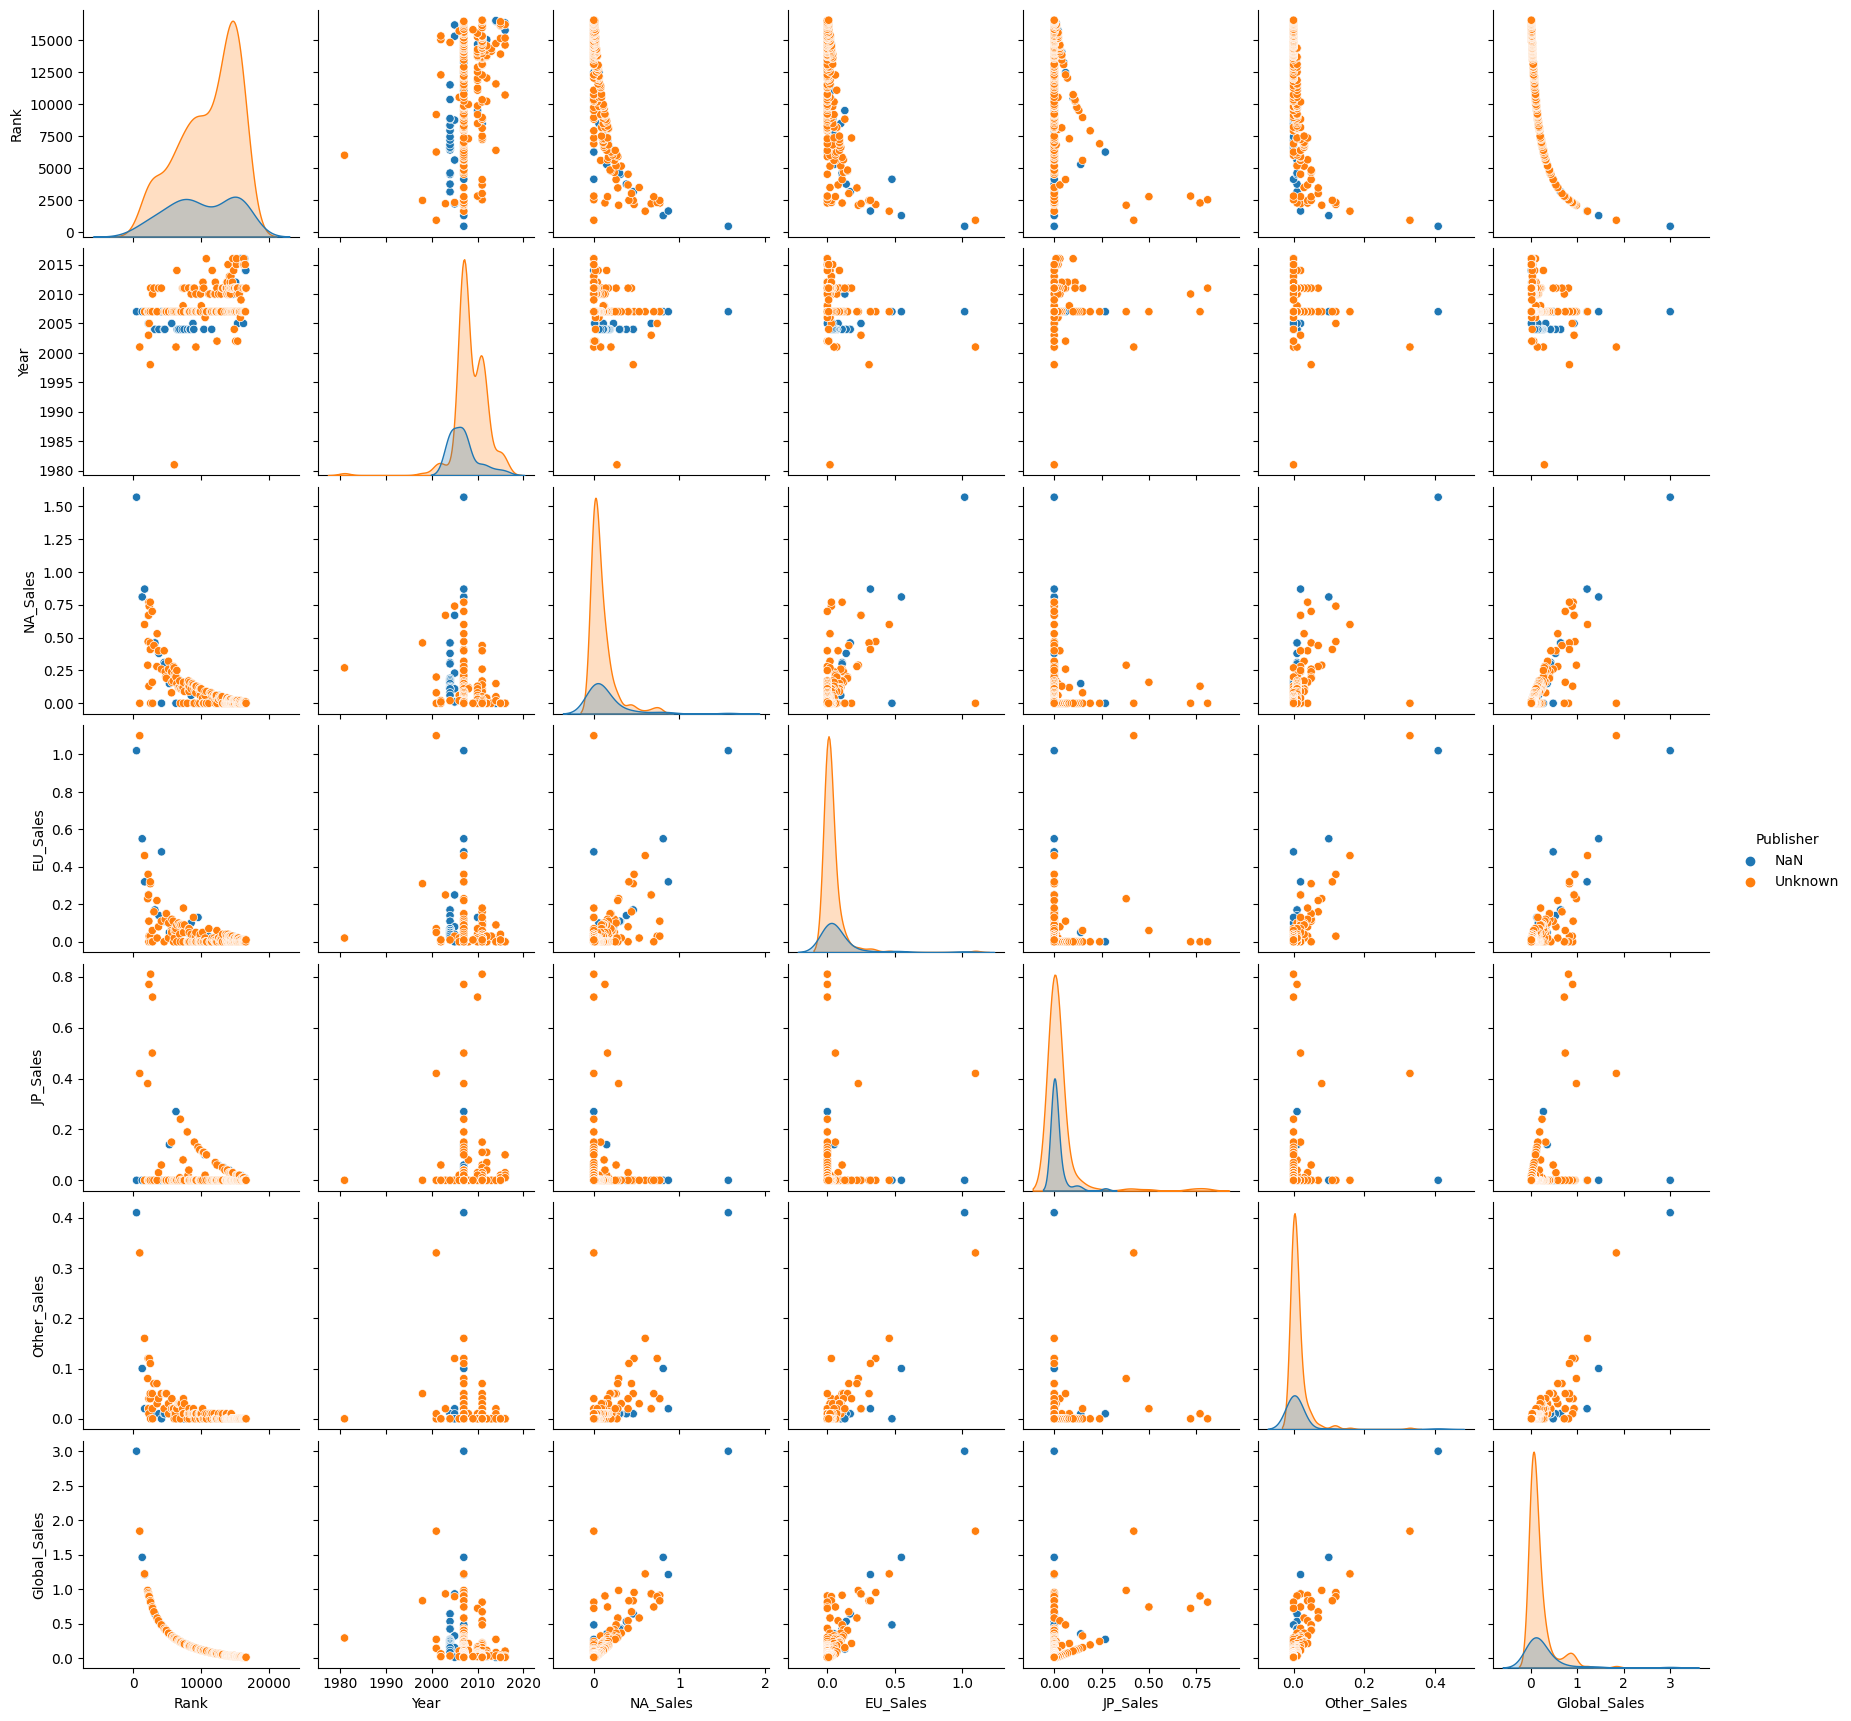

In [ ]:
# 二つの欠損値カテゴリの分布の違い確認
import seaborn as sns
sns.pairplot(pub_missing_df, hue = 'Publisher')

In [ ]:
# sklearnの既存クラスにより欠損補完
from sklearn.impute import SimpleImputer
df = pd.read_csv('vgsales.csv')
imputer = SimpleImputer(strategy='median')
# ※本来であれば、fit→学習データで、transform→テストデータでわける
df['Year'] = imputer.fit_transform(df[['Year']])

In [ ]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,2007.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2007.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2007.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2007.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2007.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [ ]:
# 最頻値をいれる
imputer = SimpleImputer(strategy='most_frequent')
df['Publisher'] = imputer.fit_transform(df[['Publisher']])

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.iloc[pub_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,Electronic Arts,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,2007.0,Sports,Electronic Arts,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Electronic Arts,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,Electronic Arts,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,Electronic Arts,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Electronic Arts,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,Electronic Arts,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2007.0,Platform,Electronic Arts,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Electronic Arts,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,Electronic Arts,0.30,0.11,0.00,0.01,0.42


## Platformによって中央値を変える

In [36]:
import numpy as np
df = pd.read_csv('vgsales.csv')

In [ ]:
platform_year_dict = df.groupby('Platform').median()['Year'].to_dict()

<ipython-input-75-eca68c479a24>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform_year_dict = df.groupby('Platform').median()['Year'].to_dict()


In [ ]:
platform_year_dict

{'2600': 1982.0,
 '3DO': 1995.0,
 '3DS': 2013.0,
 'DC': 2000.0,
 'DS': 2008.0,
 'GB': 1997.0,
 'GBA': 2003.0,
 'GC': 2003.0,
 'GEN': 1993.0,
 'GG': 1992.0,
 'N64': 1999.0,
 'NES': 1986.5,
 'NG': 1994.5,
 'PC': 2009.0,
 'PCFX': 1996.0,
 'PS': 1998.0,
 'PS2': 2005.0,
 'PS3': 2011.0,
 'PS4': 2015.0,
 'PSP': 2009.0,
 'PSV': 2014.0,
 'SAT': 1996.0,
 'SCD': 1994.0,
 'SNES': 1994.0,
 'TG16': 1995.0,
 'WS': 2000.0,
 'Wii': 2009.0,
 'WiiU': 2013.0,
 'X360': 2010.0,
 'XB': 2004.0,
 'XOne': 2015.0}

In [ ]:
df['Year'] = df.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

In [ ]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2005.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2005.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2009.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,1982.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2003.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2009.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2011.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2003.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## 学習データでのみ補完データ作りテストデータで値使っていく

In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
# 日本での売り上げ予測するモデル作成
from sklearn.model_selection import train_test_split
df.drop('Global_Sales', inplace=True, axis=1)
target = 'JP_Sales'
X = df.drop(target, axis=1)
y = df[target]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
platform_yer_dict = X_train.groupby('Platform').median()['Year'].to_dict()
X_train['Year'] = X_train.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

<ipython-input-92-6b8feadda01c>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform_yer_dict = X_train.groupby('Platform').median()['Year'].to_dict()


In [ ]:
X_test['Year'] = X_test.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

In [ ]:
X_test

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales
1586,1588,Tom Clancy's Rainbow Six: Vegas,PS3,2007.0,Shooter,Ubisoft,0.47,0.53,0.22
5368,5370,Monster Rancher 4,PS2,2003.0,Simulation,Tecmo Koei,0.08,0.06,0.02
6275,6277,Dynasty Warriors,PS,1997.0,Action,Tecmo Koei,0.09,0.06,0.02
9130,9132,Bravo Air Race,PS,1997.0,Racing,THQ,0.08,0.05,0.01
5759,5761,Football Manager 2016,PC,2015.0,Simulation,Sega,0.00,0.29,0.02
...,...,...,...,...,...,...,...,...,...
6020,6022,FIFA Soccer 13,3DS,2012.0,Action,Electronic Arts,0.06,0.20,0.03
1643,1645,Chocobo no Fushigi Dungeon,PS,1997.0,Role-Playing,SquareSoft,0.00,0.00,0.08
4002,4004,Super Famista 5,SNES,1996.0,Sports,Namco Bandai Games,0.00,0.00,0.00
7259,7261,Pinball Hall of Fame: The Williams Collection,PS3,2009.0,Misc,Crave Entertainment,0.20,0.00,0.02


## kNNによる欠損補完

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [5]:
cd /content/drive/MyDrive/機械学習_本番編

/content/drive/MyDrive/機械学習_本番編


In [ ]:
# ゲームの売り上げデータロード
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df[['Publisher']] = df[['Publisher']].fillna('NaN')
# NameはYearを予測するのに不要のため落とす
df.drop("Name", axis=1, inplace=True)
target = "Year"
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
X

,Rank,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
X.select_dtypes(include=np.number).columns.to_list()

['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [ ]:
# 数値カラム保管(スケーリング対象)
num_cols = X.select_dtypes(include=np.number).columns.to_list()
# カテゴリカル変数のダミー化(one-hot
X = pd.get_dummies(X, drop_first=True)
# スケーリング
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

In [ ]:
X

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,-1.732076,50.480508,57.136930,11.938058,44.606085,52.864025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.731867,35.284437,6.794188,21.767296,3.828224,25.532503,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.731659,19.084273,25.197785,12.002724,17.297115,22.690025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.731450,18.961823,21.497277,10.353740,15.441165,20.876498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.731241,13.476053,17.302048,32.792857,5.047848,19.828254,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,1.731197,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,1.731406,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,1.731615,-0.324086,-0.290207,-0.251492,-0.254864,-0.339194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,1.731823,-0.324086,-0.270418,-0.251492,-0.254864,-0.339194,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# データ分割
test_indexes = df[df['Year'].isna()].index
train_indexes = df[~df['Year'].isna()].index

X_train, X_test = X.iloc[train_indexes], X.iloc[test_indexes]
y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]



In [ ]:
# kNNモデル構築とテスト
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
# 確認:Regressorを使っているので平均値をとるため、小数点あり。少数嫌であれば、Regressor→classifierで多数決
y_pred

array([2004.33333333, 2005.        , 2008.66666667, 2003.33333333,
       1980.66666667, 2009.33333333, 1990.66666667, 2009.        ,
       2009.66666667, 2009.        , 2010.66666667, 2009.66666667,
       1999.        , 2010.66666667, 2008.        , 1982.33333333,
       1982.        , 2002.33333333, 2003.33333333, 2008.        ,
       1998.66666667, 1997.66666667, 2013.66666667, 1982.        ,
       2005.        , 2010.66666667, 2014.33333333, 2002.        ,
       2001.        , 2009.66666667, 2014.33333333, 2014.66666667,
       2006.66666667, 2003.66666667, 2010.33333333, 2009.        ,
       2009.33333333, 2001.66666667, 2011.33333333, 2008.        ,
       2004.        , 2011.        , 2006.66666667, 2006.        ,
       2002.33333333, 2009.        , 2007.33333333, 2003.33333333,
       2004.33333333, 2004.33333333, 2003.        , 1983.66666667,
       2012.33333333, 2010.        , 1983.33333333, 2009.        ,
       1982.33333333, 2003.33333333, 1982.33333333, 2011.66666

In [ ]:
# knnに使われたデータを確認(1がindex)
neighbors= knn.kneighbors(X_test.head(1))
df.loc[neighbors[1][0]]

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
210,211,PS3,2007.0,Action,Sony Computer Entertainment,2.31,1.73,0.12,0.78,4.94
239,240,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
278,279,PS,1997.0,Action,Hasbro Interactive,3.79,0.27,0.00,0.11,4.16


In [ ]:
# テストサンプルデータ
df.loc[X_test.head(1).index]

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23


In [ ]:
y_pred[0]

2004.3333333333333

Global Salesに引っ張られているため、落とすなどするとよさそう

## kNNImputerによる補完

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
# 最近実装されたデフォルトだとnumpy arrayで返ってくるが、dfで返す
imputer.set_output(transform='pandas')
# カテゴリカル変数のダミー化(one-hot
df = pd.get_dummies(df, drop_first=True)
# スケーリング
df[num_cols] = StandardScaler().fit_transform(df[num_cols])
df_imputed = imputer.fit_transform(df)

In [ ]:
# 先ほどと同じ補完される
df_imputed.iloc[test_indexes]

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
179,-1.694720,2004.333333,4.892293,0.224302,-0.219159,3.510062,3.017760,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,-1.653398,2005.000000,0.398370,4.379953,-0.122160,2.449519,1.898775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,-1.642129,2008.666667,1.953488,1.728252,-0.251492,1.282922,1.692985,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,-1.633990,2003.333333,1.598383,1.728252,-0.251492,1.919248,1.583659,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,-1.605399,1980.666667,2.565739,-0.013164,-0.251492,-0.095783,1.281404,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,1.671511,2003.333333,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16327,1.675685,2009.666667,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16366,1.683824,2014.000000,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16427,1.696554,2009.333333,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## それぞれの欠損値代入による精度比較

In [1]:
# 各結果を格納する用
results = {}

### 欠損値を落とすケース

In [6]:
cd /content/drive/MyDrive/機械学習_本番編

/content/drive/MyDrive/機械学習_本番編


In [7]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# 統計量確認
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


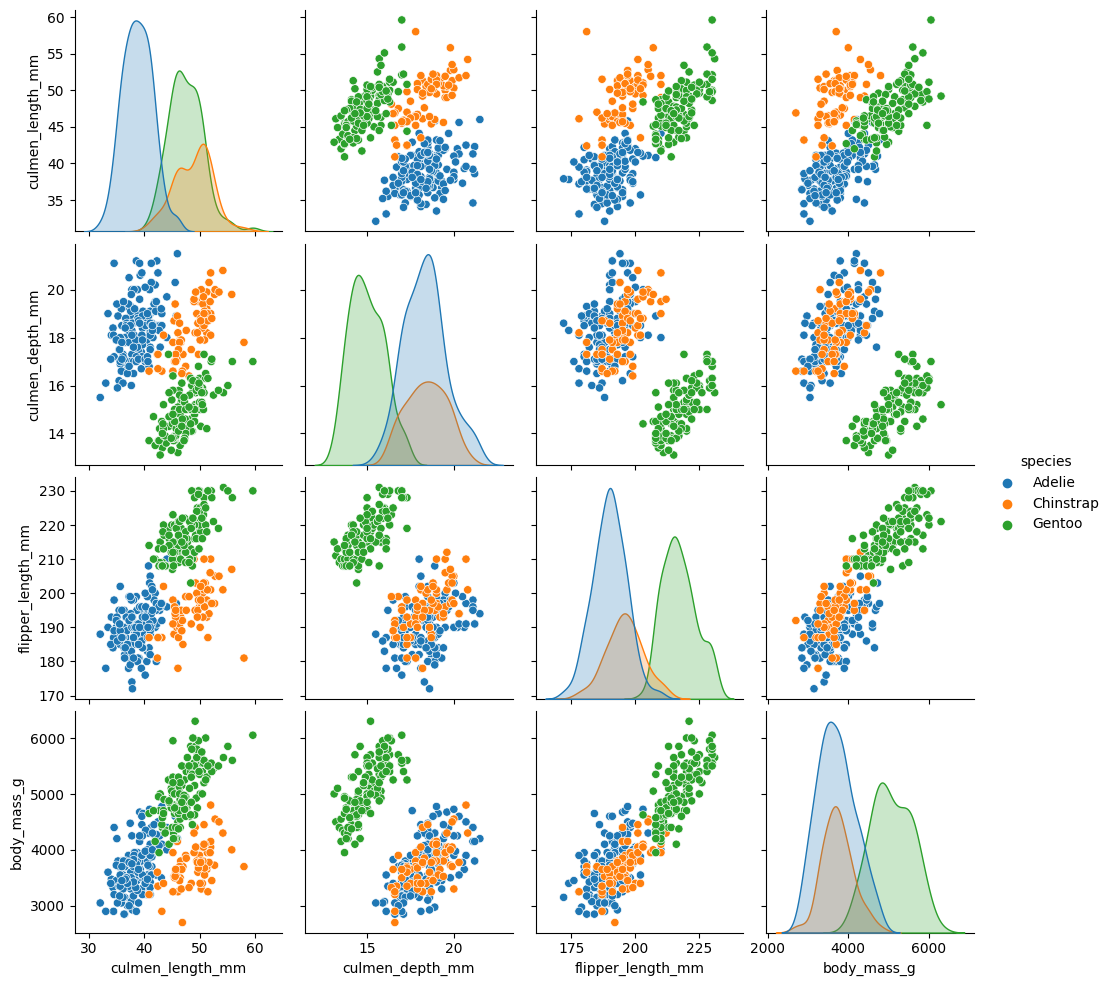

In [9]:
import seaborn as sns
sns.pairplot(df,hue='species')

ヒストグラム見ると特に外れ値なさそう

<ipython-input-10-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

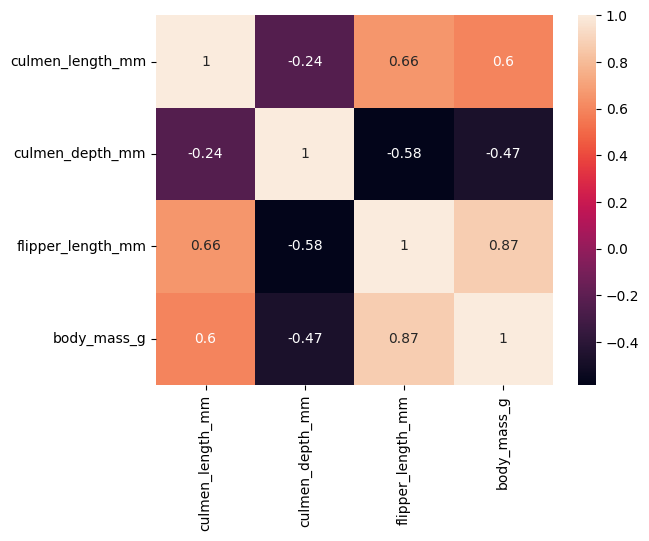

In [10]:
sns.heatmap(df.corr(), annot=True)

体重と翼の長さ相関あり→納得
くちばしが長いと、翼長く体重大きい
くちばしの長さと高さは相関なさそう

→今回は相関高そうなものあまりないので特にカラム落としたりする必要はなさそう

In [14]:
import numpy as np
# カテゴリカル変数ごとのバリエーション確認
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
for cat_col in cat_cols:
    print(f"======={cat_col}=======")
    print(df[cat_col].value_counts())

=======species=======
Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64
=======island=======
Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64
=======sex=======
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [15]:
# "."の欠損値扱い
df.loc[df[df['sex']=='.'].index,'sex'] = np.nan

In [16]:
# カテゴリカル変数ごとのバリエーション再確認
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
for cat_col in cat_cols:
    print(f"======={cat_col}=======")
    print(df[cat_col].value_counts())

=======species=======
Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64
=======island=======
Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64
=======sex=======
MALE      168
FEMALE    165
Name: sex, dtype: int64


In [17]:
df[df['sex'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


3番目と339番目のデータは他カラムも欠損しているため、実際の業務なら落としてよいが<br>
今回は練習のため欠損値の代入をする

In [18]:
df.dropna(inplace=True)
target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# 前処理
# ダミー変数
X = pd.get_dummies(X, drop_first=True)

# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
# モデルの学習はパイプラインにて実行
# cross_val_score(model, cv=cv)

# Pipeline(標準化とモデルの学習処理二つセット)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

LogisticRegression

# タプルのリストをいれる
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

In [19]:
# 精度確認:neg_log_lossにより高ければ精度良い
scores

array([-0.03091651, -0.03409773, -0.0251874 , -0.02182753, -0.04056498,
       -0.0219132 , -0.05901819, -0.03135818, -0.02726879, -0.01948955,
       -0.03087979, -0.0261894 , -0.02679606, -0.03001566, -0.03017744])

In [20]:
# 15回の平均値
results['drop'] = -np.mean(scores)

In [21]:
results

{'drop': 0.030380026442621725}

### 欠損を新カテゴリとする


In [62]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
df.info()
# "."の欠損値扱い
df.loc[df[df['sex']=='.'].index,'sex'] = np.nan
target = 'species'
X = df.drop(target, axis=1)
y = df[target]
# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [38]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [39]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [63]:
# transformer継承し、pipeline用にtransformerインスタンスを組み込むためダミー変数化クラスを定義
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.columns = None

    # dummy変数にyいらないためNone
    def fit(self, X ,y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        # 学習時のカラムを使用(テスト時はバリエーション少なくなる可能性あるため)
        return X_new.reindex(columns=self.columns, fill_value=0)


In [52]:
gd = GetDummies()
gd.fit(X)
gd.transform(X)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,1,0,0,0,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
# column transformer (imputer)
ct = ColumnTransformer([('imputer_cat',SimpleImputer(strategy='constant', fill_value='NaN'), cat_cols),
                        ('imputer_num', SimpleImputer(strategy='median'), num_cols)])
# numpyarrayではなくdfで返ってくるようにする
ct.set_output(transform='pandas')

# pipeline(dummy+scaler+model) ※ダミー変数化した後に標準化される→カラムトランスフォーマーに標準化入れる必要あり（kNNでやる）
pipeline = Pipeline(steps=[('ct', ct),
                ('dummy', GetDummies()),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')
results['median'] = -np.mean(scores)
results

{'drop': 0.030380026442621725, 'median': 0.03241178769196695}

今回は5foldの結果だけを比較してるからdropしたところの有意性でてない・・

In [57]:
# pipeline確認
pipeline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('imputer_cat',
                                                  SimpleImputer(fill_value='NaN',
                                                                strategy='constant'),
                                                  ['island', 'sex']),
                                                 ('imputer_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])])),
                ('dummy', GetDummies()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [41]:
# ColumnTransformerの変換データ確認
X_ct = ct.fit_transform(X)

In [42]:
X_ct

,imputer_cat__island,imputer_cat__sex,imputer_num__culmen_length_mm,imputer_num__culmen_depth_mm,imputer_num__flipper_length_mm,imputer_num__body_mass_g
0,Torgersen,MALE,39.10,18.7,181.0,3750.0
1,Torgersen,FEMALE,39.50,17.4,186.0,3800.0
2,Torgersen,FEMALE,40.30,18.0,195.0,3250.0
3,Torgersen,NaN,44.45,17.3,197.0,4050.0
4,Torgersen,FEMALE,36.70,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Biscoe,NaN,44.45,17.3,197.0,4050.0
340,Biscoe,FEMALE,46.80,14.3,215.0,4850.0
341,Biscoe,MALE,50.40,15.7,222.0,5750.0
342,Biscoe,FEMALE,45.20,14.8,212.0,5200.0


### 欠損をkNNで予測したケース(カテゴリカル変数は最頻値)

In [68]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
df.info()
# "."の欠損値扱い
df.loc[df[df['sex']=='.'].index,'sex'] = np.nan
target = 'species'
X = df.drop(target, axis=1)
y = df[target]
# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

# transformer継承し、pipeline用にtransformerインスタンスを組み込むためダミー変数化クラスを定義
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.columns = None

    # dummy変数にyいらないためNone
    def fit(self, X ,y=None):
        self.columns = pd.get_dummies(X).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X)
        # 学習時のカラムを使用(テスト時はバリエーション少なくなる可能性あるため)
        return X_new.reindex(columns=self.columns, fill_value=0)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
# 単純にスケーラーとKNNImputerをそれぞれcolumntransformerにそれぞれ入れると同時二それぞれ実行されるため、pipeline化しておく
num_pipeline= Pipeline([('scaler', StandardScaler()),('imputer_num', KNNImputer())])
# column transformer (most_imputer+scaler+KNNimputer)
ct = ColumnTransformer([('imputer_cat',SimpleImputer(strategy='most_frequent'), cat_cols),
                        ('scaler+imputer_num', num_pipeline, num_cols)])
# numpyarrayではなくdfで返ってくるようにする
ct.set_output(transform='pandas')

# pipeline(dummy+scaler+model) ※ダミー変数化した後に標準化される→カラムトランスフォーマーに標準化入れる必要あり（kNNでやる）
pipeline = Pipeline(steps=[('ct', ct),
                ('dummy', GetDummies()),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')
results['knn'] = -np.mean(scores)
results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


{'drop': 0.030380026442621725,
 'median': 0.03241178769196695,
 'knn': 0.031719666645156824}

In [67]:
# columntransformerの確認
ct

ColumnTransformer(transformers=[('imputer_cat',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['island', 'sex']),
                                ('scaler+imputer_num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer_num',
                                                  KNNImputer())]),
                                 ['culmen_length_mm', 'culmen_depth_mm',
                                  'flipper_length_mm', 'body_mass_g'])])

## カテゴリカルエンコーディングの種類

### Label Encoding

In [69]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [70]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.set_output(transform='pandas')
df = oe.fit_transform(df)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,42.0,56.0,6.0,31.0,2.0
1,0.0,2.0,45.0,43.0,11.0,33.0,1.0
2,0.0,2.0,51.0,49.0,20.0,12.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,22.0,62.0,18.0,19.0,1.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,105.0,12.0,39.0,66.0,1.0
341,2.0,0.0,136.0,26.0,46.0,87.0,2.0
342,2.0,0.0,89.0,17.0,36.0,76.0,1.0
